# Exploratory Data Analysis

### Required Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
import os

In [6]:
os.chdir('c:/Projects/Delis Project/Data')
print(os.getcwd())

c:\Projects\Delis Project\Data


### Data Importation

In [22]:
# Load and prepare data
data1 = pd.read_csv('data1.csv',  names=['Product', 'Category','Unit price','Date','Stock','Consommation'])
data1.head()

,Product,Category,Unit price,Date,Stock,Consommation
0,Product_Key\tmetier\tPrix Unitaire Facture\tDa...,NaN,NaN,NaN,NaN,NaN
1,49672\tPAT\t3.7\t19/02/2016 00:00\t28800\t13200,NaN,NaN,NaN,NaN,NaN
2,49672\tPAT\t2.96\t30/03/2016 00:00\t28800\t13200,NaN,NaN,NaN,NaN,NaN
3,63570\tVIEN\t5.640016\t28/01/2016 00:00\t53100...,NaN,NaN,NaN,NaN,NaN
4,63499\tVIEN\t6.699968\t28/01/2016 00:00\t80352...,NaN,NaN,NaN,NaN,NaN


In [95]:

split_data = data1['Product'].str.split('\t', expand=True)
data = pd.DataFrame({
    'Product_id': split_data[0],
    'Category': split_data[1],
    'Unit price': split_data[2],
    'Date': split_data[3],
    'Stock': split_data[4],
    'Consommation': split_data[5]
})
data = data.drop(0)
data['Product_id']= pd.to_numeric(data['Product_id'])
data['Date']= pd.to_datetime(data['Date'])
data['Stock']= pd.to_numeric(data['Stock'])
data['Unit price'] = pd.to_numeric(data['Unit price'])
data['Consommation']= pd.to_numeric(data['Consommation'])


C:\Users\azedd\AppData\Local\Temp\ipykernel_16748\205760586.py:12: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']= pd.to_datetime(data['Date'])


In [96]:
data.to_csv("data.csv")

## General inspection

#### see what our dataset looks like

In [97]:
data.head()

,Product_id,Category,Unit price,Date,Stock,Consommation
1,49672,PAT,3.700000,2016-02-19,28800.0,13200.0
2,49672,PAT,2.960000,2016-03-30,28800.0,13200.0
3,63570,VIEN,5.640016,2016-01-28,53100.0,10800.0
4,63499,VIEN,6.699968,2016-01-28,80352.0,10656.0
5,48703,BOUL,18.733144,2016-02-02,9840.0,10120.0


In [98]:
print("la frome de la datset est la suivante:")
data.shape

la frome de la datset est la suivante:


(29999, 6)

In [100]:
print("les types de variables qui se presentent dans le dataset sont :")
data.dtypes

les types de variables qui se presentent dans le dataset sont :


Product_id               int64
Category                object
Unit price             float64
Date            datetime64[ns]
Stock                  float64
Consommation           float64
dtype: object

In [102]:

print(f"Time Range: {data['Date'].min().date()} to {data['Date'].max().date()}")

Time Range: 2016-01-01 to 2016-03-31


#### Combien on a de produits

In [104]:

print(f"Unique Products: {data['Product_id'].nunique()}")


Unique Products: 523


#### Combien de valeurs manquantes

In [105]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Product_id          0
Category            0
Unit price      17328
Date                0
Stock            2799
Consommation    17026
dtype: int64



Correlation Matrix:
              Unit price     Stock  Consommation
Unit price      1.000000  0.451075      0.842419
Stock           0.451075  1.000000      0.860113
Consommation    0.842419  0.860113      1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

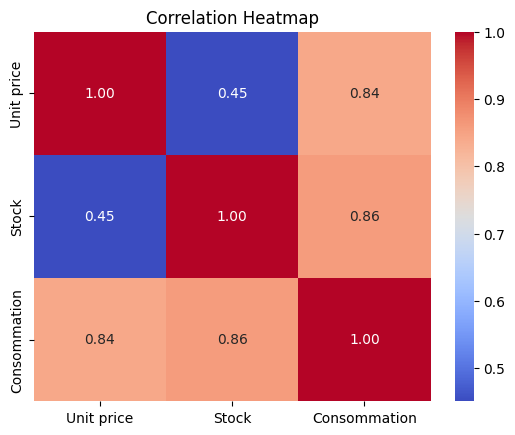

In [112]:
numdata = data[['Unit price','Stock','Consommation']].describe()
corr = numdata.corr()
print("\nCorrelation Matrix:")
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

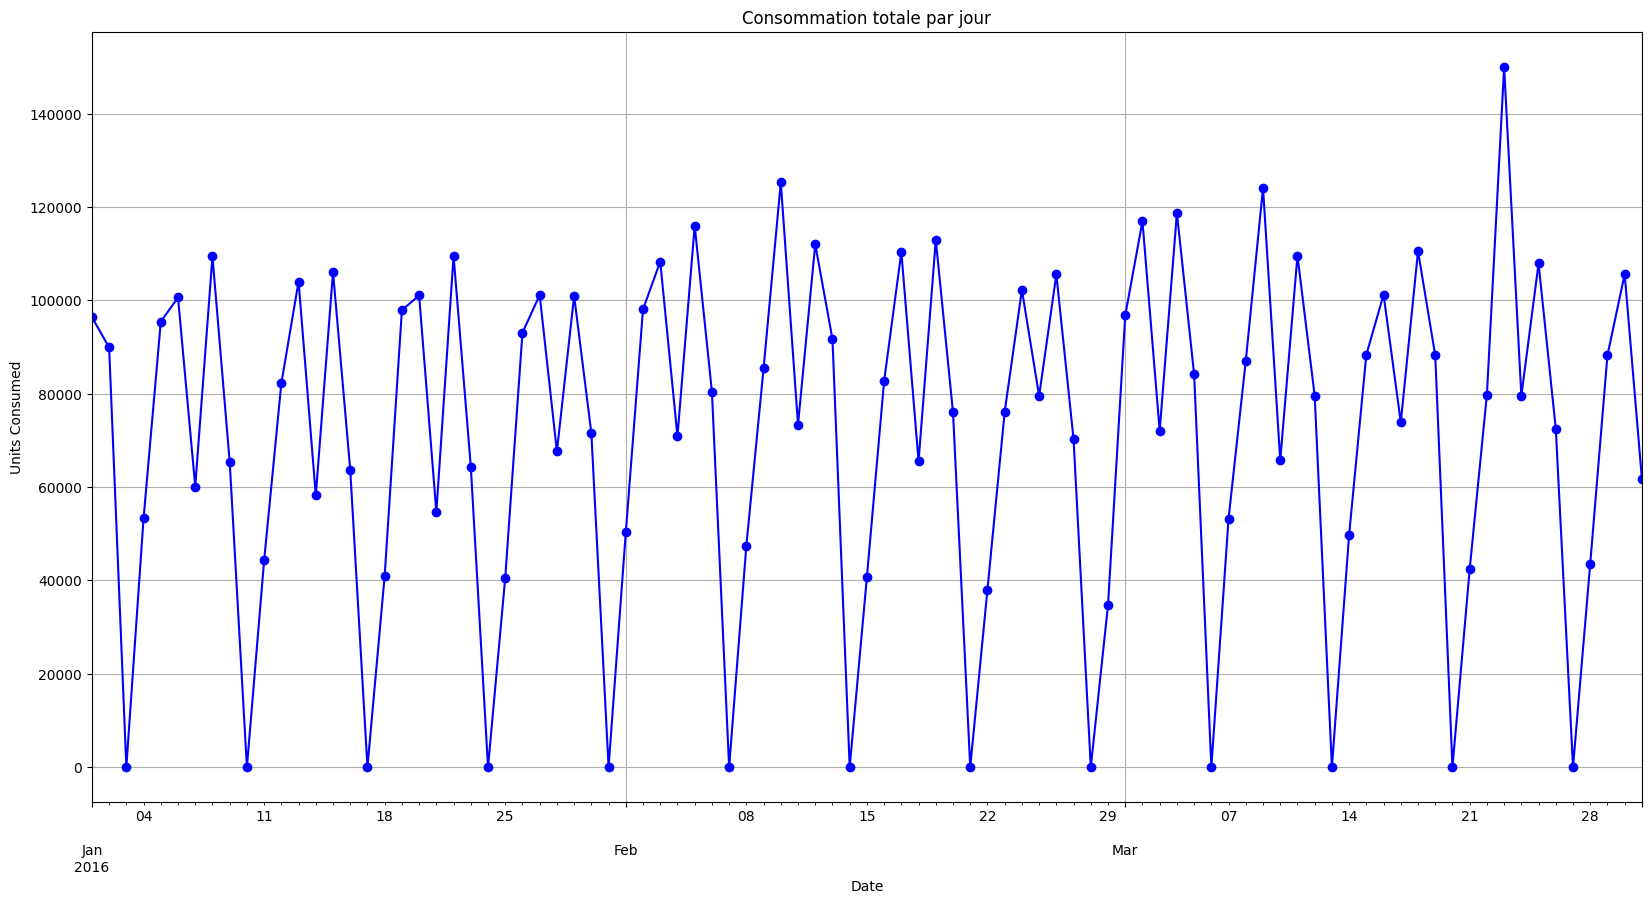

In [114]:
plt.figure(figsize=(20, 10))
data.groupby('Date')['Consommation'].sum().plot(title='Consommation totale par jour', color='blue', marker='o')
plt.ylabel('Units Consumed')
plt.grid(True)
plt.show()

#### Stock vs Consommation par jour de chaque produit

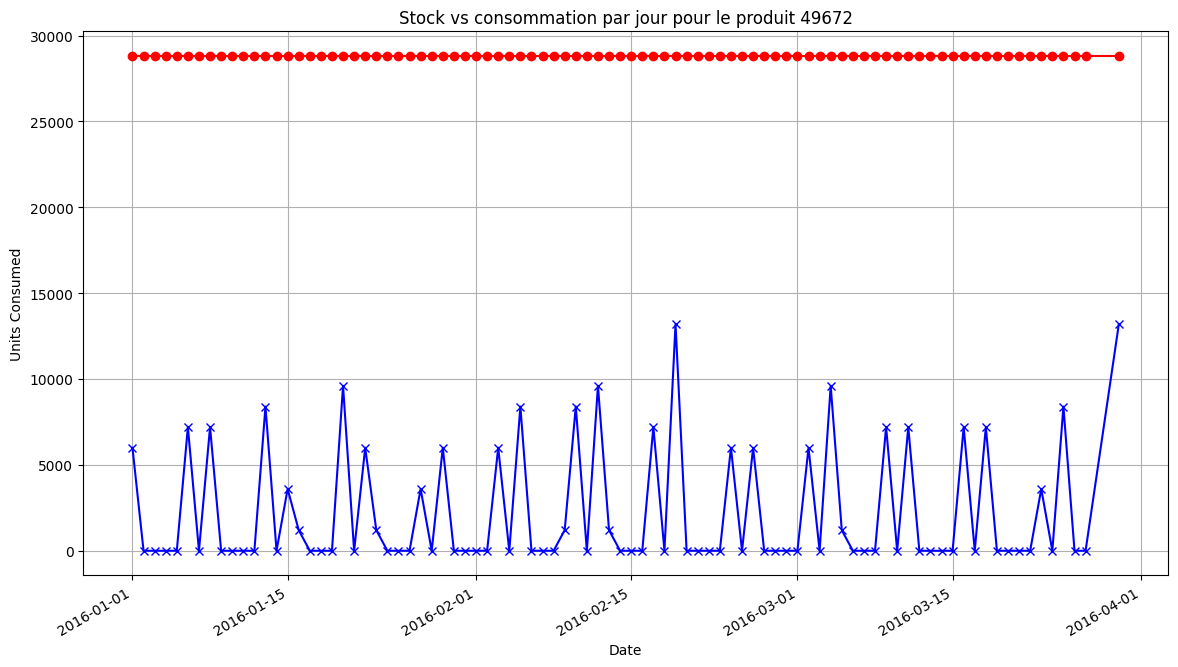

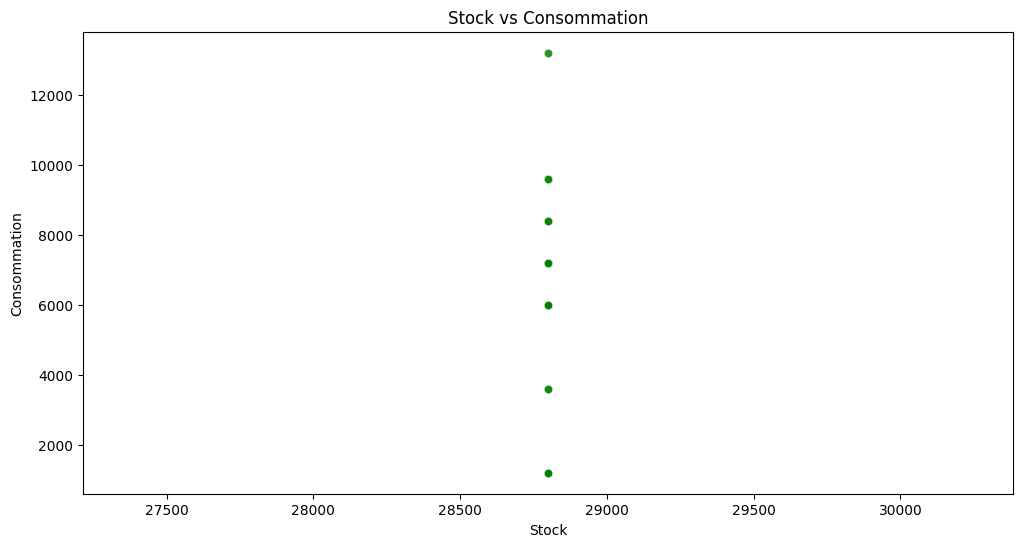

In [124]:
# cpjcp est une fonction qui permet de visualiser la consommation par jour de chaque produit
def cpjcp(Product_id):
    plt.figure(figsize=(14, 8))
    data[Product_id == data['Product_id']].groupby('Date')['Consommation'].sum().plot( color='blue', marker='x')
    data[Product_id == data['Product_id']].groupby('Date')['Stock'].sum().plot(title=f'Stock vs consommation par jour pour le produit {Product_id}', color='Red', marker='o')
    plt.ylabel('Units Consumed')
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Stock', y='Consommation', data=data[data['Product_id'] == Product_id], alpha=0.6, color='green')
    plt.title('Stock vs Consommation')
    plt.show()

cpjcp(49672)

### stock distrubtion analysis

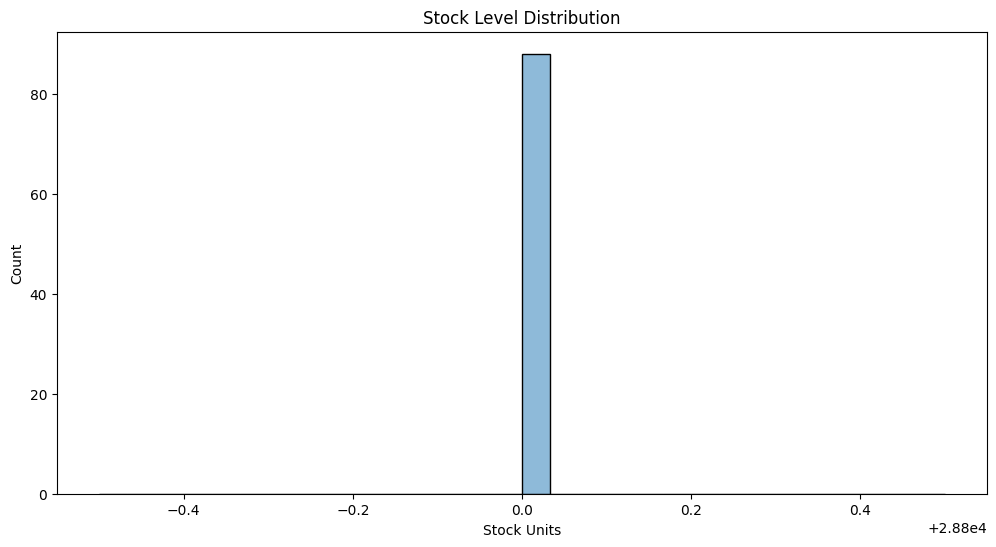

In [137]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Product_id'] == 49672]['Stock'], bins=30, kde=True)
plt.title('Stock Level Distribution')
plt.xlabel('Stock Units')
plt.show()

### Consommation vs Rapprovisionnement

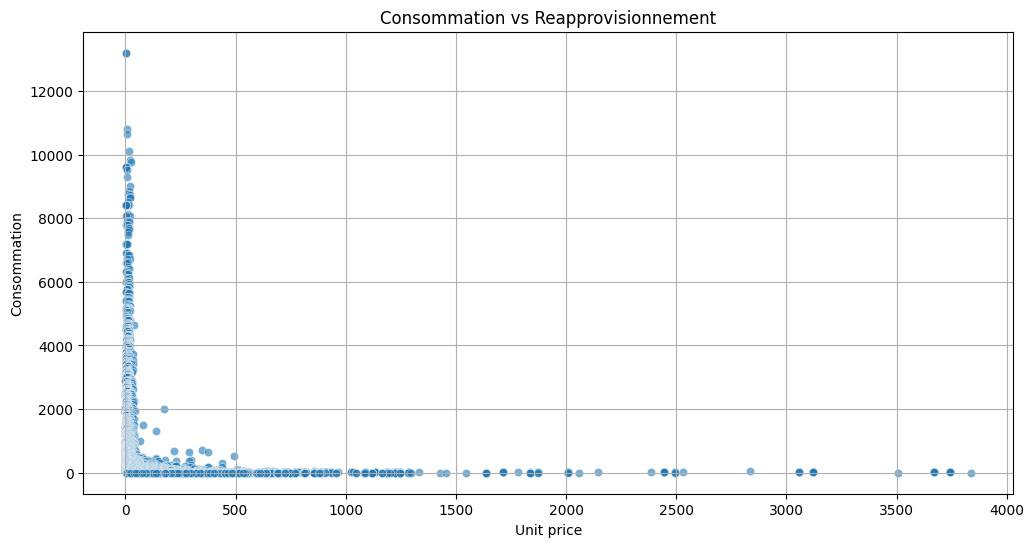

In [139]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Unit price', y='Consommation', data = data, alpha=0.6)
plt.title('Consommation vs Reapprovisionnement')
plt.grid(True)
plt.show()

### stock out risk analysis

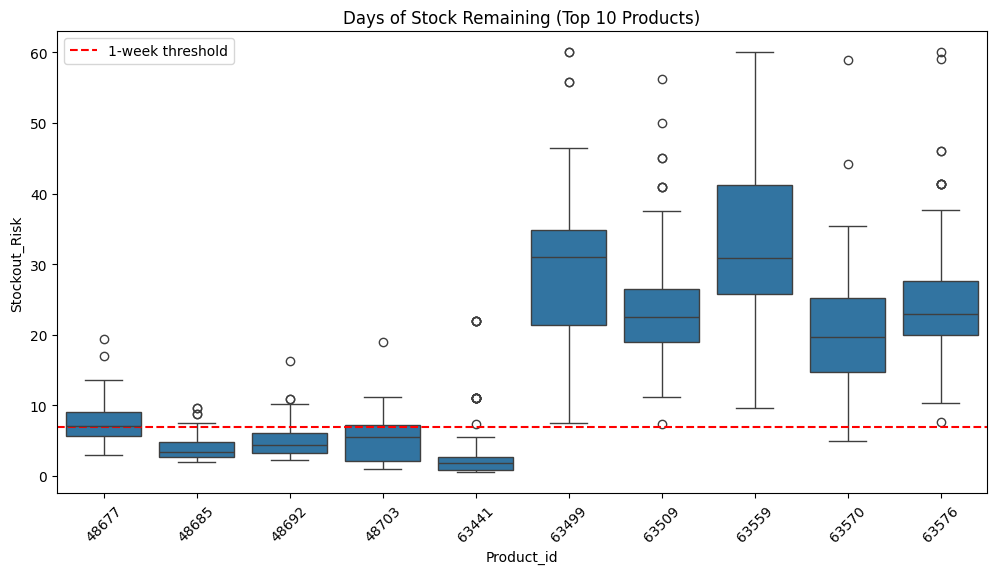

In [140]:
data['Stockout_Risk'] = data['Stock'] / data['Consommation'].replace(0, 0.1)  # Handle zero consumption
data['Stockout_Risk'] = data['Stockout_Risk'].clip(upper=60)  # Cap extreme values

plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_id', y='Stockout_Risk', 
            data=data[data['Product_id'].isin(data['Product_id'].value_counts().index[:10])])
plt.title('Days of Stock Remaining (Top 10 Products)')
plt.xticks(rotation=45)
plt.axhline(y=7, color='r', linestyle='--', label='1-week threshold')
plt.legend()
plt.show()

### Top products Analysis

In [141]:
top_products = data.groupby('Product_id').agg(
    Avg_Stock=('Stock', 'mean'),
    Total_Consumption=('Consommation', 'sum'),
    Stockout_Events=('Stock', lambda x: (x < 10).sum())
).sort_values('Total_Consumption', ascending=False).head(10)

print("\nTop 10 Products by Consumption:")
print(top_products)


Top 10 Products by Consumption:
            Avg_Stock  Total_Consumption  Stockout_Events
Product_id                                               
48692         19560.0           358920.0                0
48690         19800.0           290160.0                0
63499         80352.0           262080.0                0
63509         72000.0           257280.0                0
48714          6550.0           257200.0                0
63570         53100.0           256200.0                0
48703          9840.0           255480.0                0
63576         66240.0           227680.0                0
63588         67200.0           212160.0                0
49672         28800.0           198000.0                0
